<a href="https://colab.research.google.com/github/nletcher/Handwritten-Digits-Using-Neural-Network/blob/main/Handwritten_Digits_Classfication_with_Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:
import tensorflow as tf                       # deep learning library
from tensorflow import keras
import numpy as np                            # for matrix operations
import seaborn as sns
import matplotlib.pyplot as plt               # for visualization
%matplotlib inline

In [2]:
from tensorflow.keras.datasets.mnist import load_data    # To load the MNIST digit dataset

(X_train, y_train) , (X_test, y_test) = load_data()  

11493376/11490434 [==============================] - 0s 0us/step


In [3]:
len(X_train)

60000

In [4]:
 len(X_test)

10000

Check the shape of one image, say the first element at index 0 in X_train

In [5]:
X_train[0].shape

(28, 28)

View the dimensions of the image

In [6]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

Plot to see the actual image

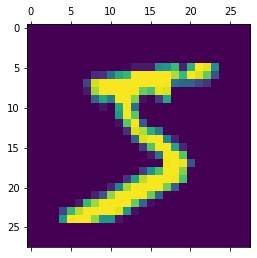

In [7]:
plt.matshow(X_train[0])

We can compare against its corresponding value in y train to crosscheck

In [8]:
y_train[0]

5

In [9]:
#check the numbers in y train
y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [10]:
X_train = X_train/255
X_test = X_test/255

In [11]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [12]:
#flatten the images
X_train_flattened = X_train.reshape(len(X_train), 28*28)
X_test_flattened = X_test.reshape(len(X_test), 28*28)

In [14]:
X_train_flattened[0].shape

(784,)

After flattening the images, now we have one single multidimension array and not a cube. This will only require a single layer of neurons

In [17]:
model = keras.Sequential ([
                           keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
])
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4702 - accuracy: 0.8774
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3038 - accuracy: 0.9149
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2834 - accuracy: 0.9209
Epoch 4/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2729 - accuracy: 0.9242
Epoch 5/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2669 - accuracy: 0.9262


In [18]:
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.2663 - accuracy: 0.9269


[0.26629090309143066, 0.9269000291824341]

In [27]:
y_predicted = model.predict(X_test_flattened)
y_predicted[1]

array([4.9477050e-01, 6.1167777e-03, 9.9959946e-01, 4.9041972e-01,
       5.6397947e-10, 8.7010604e-01, 9.3423718e-01, 1.0524275e-12,
       2.5505042e-01, 3.6311454e-09], dtype=float32)

In [28]:
np.argmax(y_predicted[1])

2

In [24]:
y_test[:5]
#checks the predicted number against the actual value

array([7, 2, 1, 0, 4], dtype=uint8)

Text(69.0, 0.5, 'Truth')

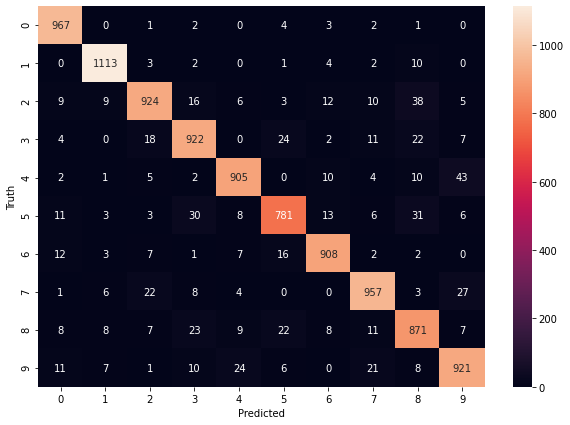

In [32]:
#building overall accuracy checker
y_predicted = model.predict(X_test_flattened)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm =tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels)

plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')


Adding a hidden layer to increase perfomance

In [34]:
model = keras.Sequential ([
                           keras.layers.Dense(200, input_shape=(784,), activation='relu'),
                           keras.layers.Dense(10, activation='sigmoid')
])
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2327 - accuracy: 0.9327
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0976 - accuracy: 0.9709
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0654 - accuracy: 0.9804
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0477 - accuracy: 0.9851
Epoch 5/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0351 - accuracy: 0.9890


In [35]:
model.evaluate(X_test_flattened,y_test)

313/313 [==============================] - 1s 1ms/step - loss: 0.0671 - accuracy: 0.9791


[0.06711834669113159, 0.9790999889373779]

Text(69.0, 0.5, 'Truth')

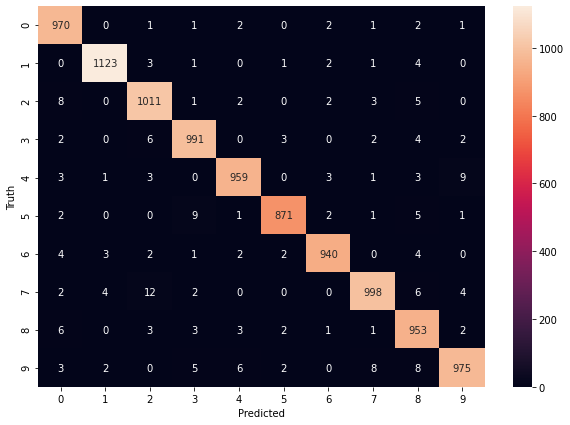

In [36]:
y_predicted = model.predict(X_test_flattened)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

Using Flatten layer so that we dont have .reshape in our input dataset

In [37]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(200, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2369 - accuracy: 0.9312
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1003 - accuracy: 0.9698
Epoch 3/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0669 - accuracy: 0.9793
Epoch 4/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0484 - accuracy: 0.9850
Epoch 5/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0370 - accuracy: 0.9882
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0277 - accuracy: 0.9910
Epoch 7/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0216 - accuracy: 0.9934
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0175 - accuracy: 0.9944
Epoch 9/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0142 - accuracy: 0.9955
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.011

In [38]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 1ms/step - loss: 0.0835 - accuracy: 0.9788


[0.0834648609161377, 0.9787999987602234]